In [1]:
#Import libraries that will be useful for data analysis
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
from datetime import datetime

In [2]:
#load in the data and confirm it has been read in
marketingData = pd.read_excel("/Users/xanderito-low/Desktop/media.xlsx",usecols = [*range(0,12)])

#convert the textual date into a datetime object that can be sorted
marketingData['Start Date'] = marketingData['Start Date'].str[5:]
marketingData['Start Date'] = marketingData['Start Date'].apply(datetime.strptime, args=('%d %b %Y',))
#sort the data by date
marketingData = marketingData.sort_values(by="Start Date")
marketingData.head()

,Start Date,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
319,2020-01-01,778628,936,115882,30-34,M,29,4608,0,0.000000,1,0
318,2020-01-01,778626,936,115882,30-34,M,29,7629,1,0.720000,1,1
630,2020-01-02,1121304,1178,144574,35-39,M,16,94257,7,12.580000,1,1
629,2020-01-02,1121303,1178,144574,35-39,M,16,84494,7,12.570000,2,0
628,2020-01-02,1121302,1178,144574,35-39,M,16,1206533,128,236.119999,17,6


xyz_campaign_id  age    gender
916              30-34  F           151603
                        M           106069
                 35-39  F            11155
                        M            69921
                 40-44  F             3812
                        M            58165
                 45-49  F            30511
                        M            51689
936              30-34  F           997424
                        M           658525
                 35-39  F           868282
                        M           243393
                 40-44  F           969407
                        M           234190
                 45-49  F          3455093
                        M           701873
1178             30-34  F         30422549
                        M         35656849
                 35-39  F         20560068
                        M         20351825
                 40-44  F         22422956
                        M         15915777
                 45-49 

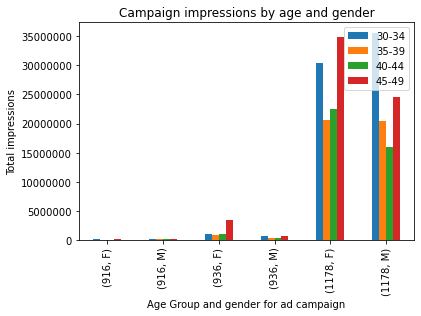

In [3]:
#Group by the specific advert campaign, the gender and age group of the individual
campaign_audience = marketingData.groupby(['xyz_campaign_id', 'age','gender'])['Impressions'].sum()

print(campaign_audience)

# Unstack channel_age and transform it into a DataFrame
campaign_audience_df = pd.DataFrame(campaign_audience.unstack(level = 1))

# Plot the results
campaign_audience_df.plot(kind = 'bar')
plt.ticklabel_format(style = 'plain', axis='y')
plt.title('Campaign impressions by age and gender')
plt.xlabel('Age Group and gender for ad campaign')
plt.ylabel('Total impressions')
# Add a legend to the plot
plt.legend(loc = 'upper right', 
        labels = campaign_audience_df.columns.values)
plt.show()


Implications and possible actions:

Campaign 1178 seems to be getting a high frequency of impressions. While this is good, the data does not include how many people are being shown the adverts, hence the number of impressions for this campaign could be subject to advert fatigue. For a future direction, the company could perhaps focus its spend on other advert campaigns to draw in more people. In order to do this, the company could analyse customer behaviour around its campaigns and create a lookalike audience based on this data for future advertising campaigns. It would seem from the data that females aged 45 to 49 and males aged 30-34 are most drawn to campaign 1178.



xyz_campaign_id  age    gender
916              30-34  F           36
                        M           21
                 35-39  F            4
                        M           13
                 40-44  F            1
                        M           13
                 45-49  F           11
                        M           14
936              30-34  F          186
                        M          100
                 35-39  F          228
                        M           47
                 40-44  F          257
                        M           54
                 45-49  F          962
                        M          150
1178             30-34  F         4877
                        M         4263
                 35-39  F         3929
                        M         2873
                 40-44  F         4919
                        M         2492
                 45-49  F         8468
                        M         4247
Name: Clicks, dtype: int64


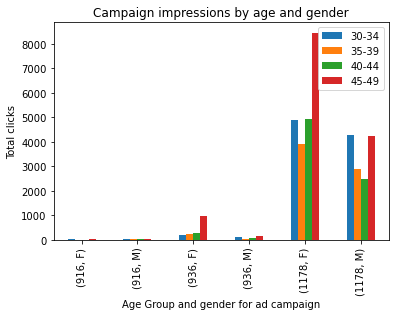

In [4]:
#Group by the specific advert campaign, the gender and age group of the individual
campaign_audience = marketingData.groupby(['xyz_campaign_id', 'age','gender'])['Clicks'].sum()
print(campaign_audience)

# Unstack channel_age and transform it into a DataFrame
campaign_audience_df = pd.DataFrame(campaign_audience.unstack(level = 1))

# Plot the results
campaign_audience_df.plot(kind = 'bar')
plt.ticklabel_format(style = 'plain', axis='y')
plt.title('Campaign impressions by age and gender')
plt.xlabel('Age Group and gender for ad campaign')
plt.ylabel('Total clicks')
# Add a legend to the plot
plt.legend(loc = 'upper right', 
        labels = campaign_audience_df.columns.values)
plt.show()

  Implications and possible actions:
  
  The number of clicks is very similar to the number of impressions for each advertisement campaign in terms of
  the audience. A similar conclusion to the one above can be derived about implications and future directions
  that the company can take.



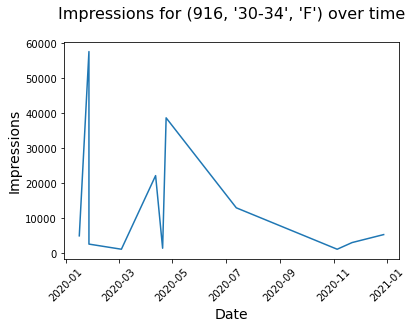

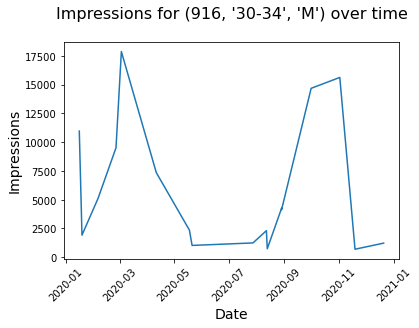

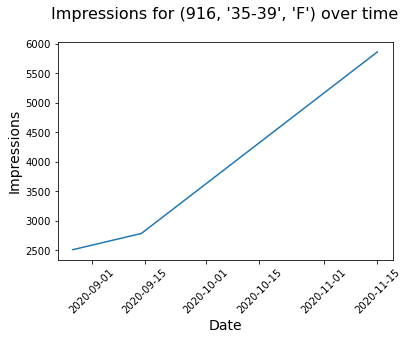

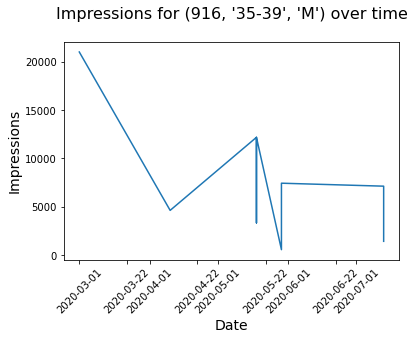

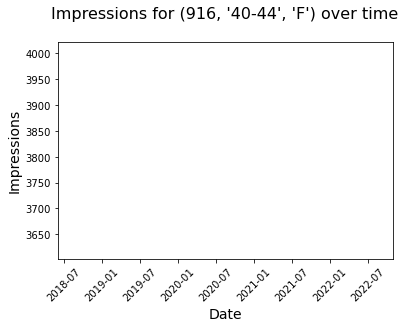

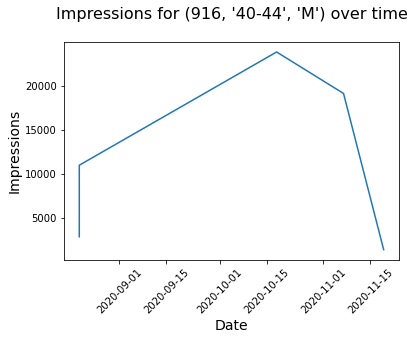

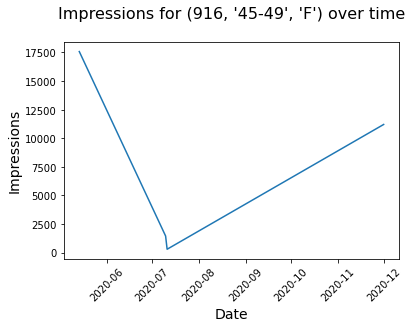

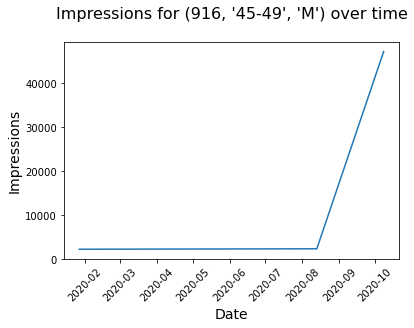

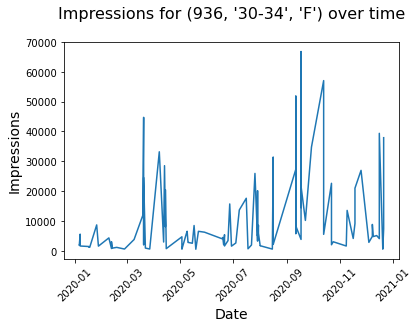

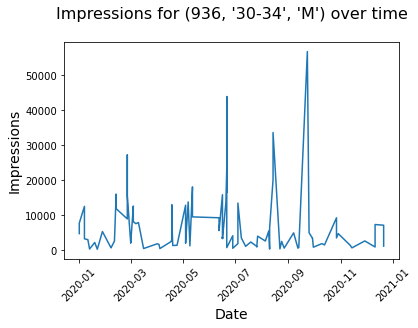

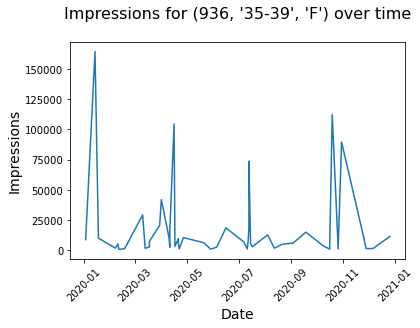

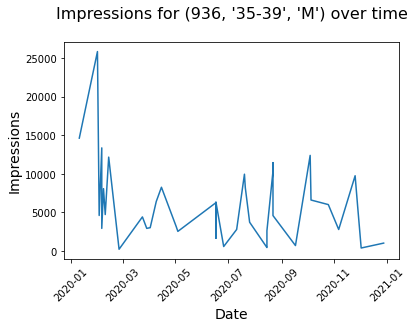

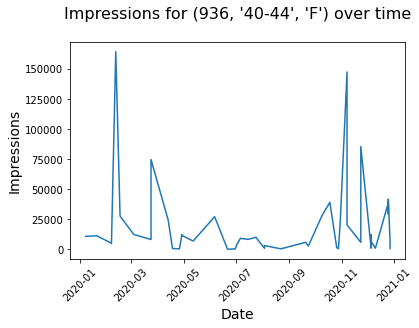

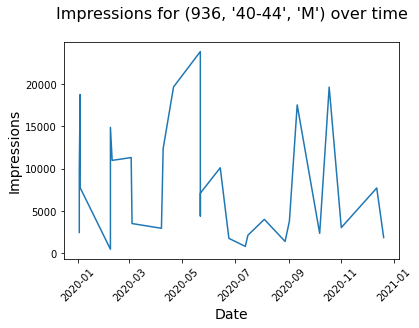

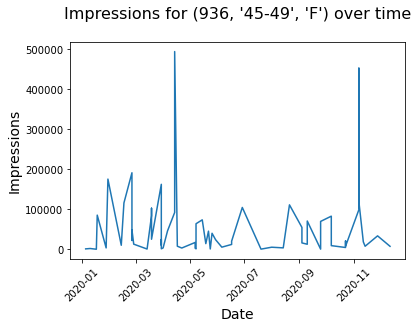

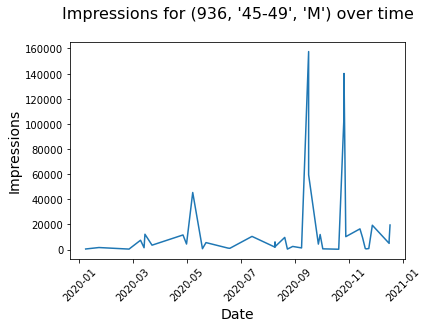

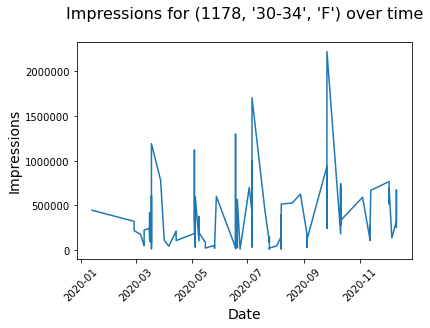

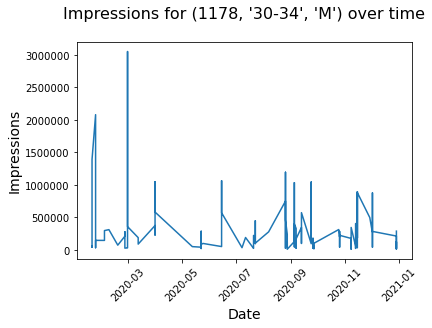

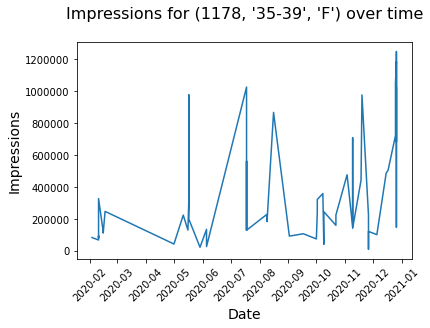

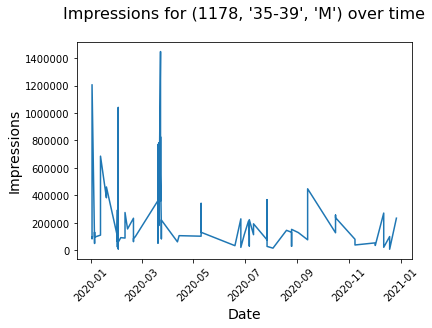

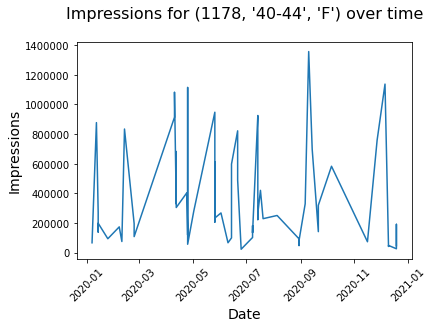

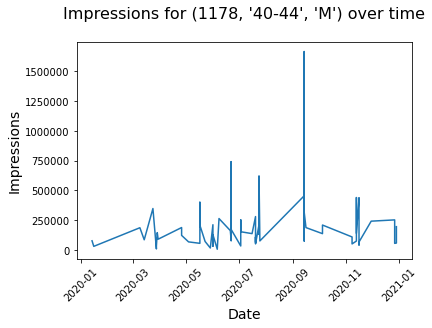

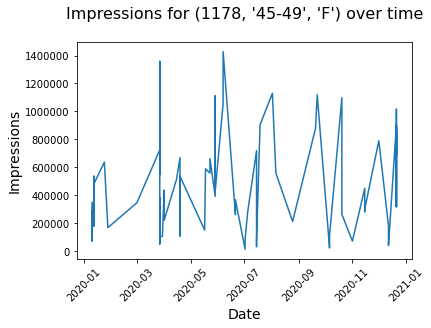

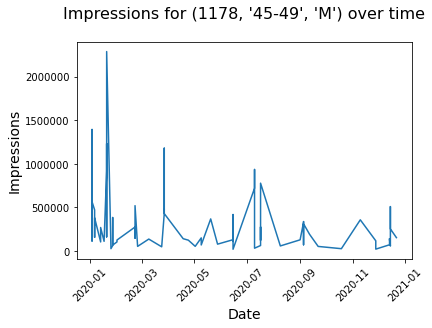

<Figure size 432x288 with 0 Axes>

In [5]:
def plotting_Impressions(dataframe):
    for nameOfGroup,group in dataframe:
        plt.ticklabel_format(style = 'plain', axis='y')
        plt.plot(group["Start Date"],group["Impressions"])
        plt.title('Impressions for ' + str(nameOfGroup) +" "+ 'over time\n', 
        size = 16)
        plt.ylabel('Impressions', size = 14)
        plt.xlabel('Date', size = 14)
        plt.xticks(rotation = 45)
        # Show plot
        plt.show()
        plt.clf()

campaign_users = marketingData.groupby(['xyz_campaign_id', 'age','gender'])

#Get raw indicies of datapoints being read in
# campaign_users.groups

#Get the actual data within a group
#An example
# campaign_users.get_group((916, '30-34', 'F'))

plotting_Impressions(campaign_users)


Implications and possible actions:

This data shows that there are certain spikes in the data for the number of impressions. They could correspond with news letters or a boost in advertising. This could show the company which stages of the year the target customer is more active, leading to a rise in engagment for the company. The company can then use this data to position their advertisements strategically across the year to attract many customers. This is a similar case for the number of clicks.

In [6]:
#Click through rate per advertising campaign (can do this for specific audience but general idea is important)
campaign = marketingData.groupby(['xyz_campaign_id'])
for nameOfGroup,group in campaign:
    totalNumberOfImpressions = group['Impressions'].sum()
    totalNumberOfClicks = group['Clicks'].sum()
    clickRate = totalNumberOfClicks/(totalNumberOfImpressions *100)
    print("The click rate for ad campaign "+str(nameOfGroup)+" "+"is "+str(clickRate))
    print("\n")

The click rate for ad campaign 916 is 2.3399078531863128e-06


The click rate for ad campaign 936 is 2.4408887246319505e-06


The click rate for ad campaign 1178 is 1.7609288955581687e-06




Implications and possible actions:

The click rate for all of the advert campaigns is very low, indicating that the adverts are not very effective in attracting customers to click on the adverts. The company may want to increase the quality of the adverts.

In [7]:
#Average time spent on an advert in a particular campaign
campaign = marketingData.groupby(['xyz_campaign_id'])
for nameOfGroup,group in campaign:
    totalTimeSpent = group['Spent'].sum()
    totalNumberOfClicks = group['Clicks'].sum()
    avgTimeSpent = totalTimeSpent/totalNumberOfClicks
    print("The average time spent on the company website for campaign "+str(nameOfGroup)+" "+"is "+str(avgTimeSpent)+' seconds.')
    print("\n")

The average time spent on the company website for campaign 916 is 1.3248672624513276 seconds.


The average time spent on the company website for campaign 936 is 1.4583518139788305 seconds.


The average time spent on the company website for campaign 1178 is 1.543255793462737 seconds.




Implications and possible actions:

This metric is slightly above the average someone spends on a website which is 45 seconds. But it is low in the sense that someone would pay for something or really commit to something. This implies that the bounce rate is relatively high. To counter this, the comapny may want to think about the type of content that is advertised to decrease the bounce rate.

age    gender
30-34  F         0.121396
       M         0.185219
35-39  F         0.073059
       M         0.109785
40-44  F         0.062198
       M         0.078546
45-49  F         0.042262
       M         0.064611
dtype: float64


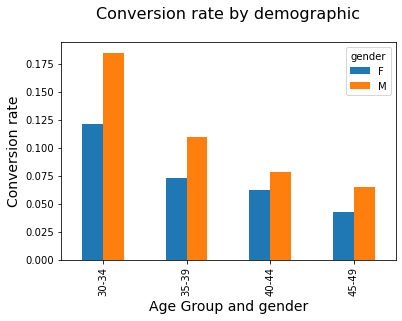

xyz_campaign_id  age    gender
916              30-34  F         0.305556
                        M         0.952381
                 35-39  F         0.750000
                        M         0.769231
                 40-44  F         2.000000
                        M         0.384615
                 45-49  F         0.363636
                        M         0.214286
936              30-34  F         0.591398
                        M         1.170000
                 35-39  F         0.236842
                        M         0.893617
                 40-44  F         0.198444
                        M         0.592593
                 45-49  F         0.090437
                        M         0.293333
1178             30-34  F         0.102112
                        M         0.158339
                 35-39  F         0.062866
                        M         0.093978
                 40-44  F         0.054686
                        M         0.065811
                 45-49 

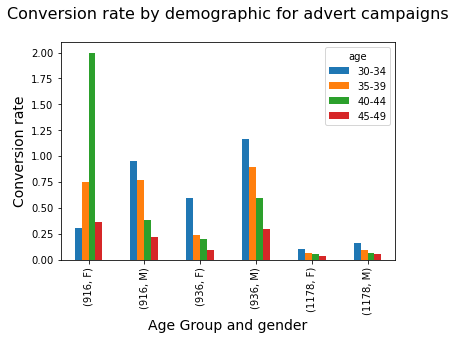

In [8]:
#conversion rate per campaign (The percentage of web visitors who are paying customers)

#Conversion rate function
def conversion_rate(dataframe, columns,conversion):
    column_conv = dataframe.groupby(columns)[conversion].sum()
    column_total = dataframe.groupby(columns)['Clicks'].sum()
    
    conversion_rate = (column_conv/column_total)
    conversion_rate = conversion_rate.fillna(0)
    print(conversion_rate)
    return conversion_rate

# Calculate conversion rate by date served and age group
demographicGroup_conv = conversion_rate(marketingData,['age','gender'],'Total_Conversion')
demographicGroup_df = pd.DataFrame(demographicGroup_conv.unstack(level = 1))

# Plot the results
demographicGroup_df.plot(kind = 'bar')
plt.title('Conversion rate by demographic\n', size = 16)
plt.ylabel('Conversion rate', size = 14)
plt.xlabel('Age Group and gender', size = 14)
plt.show()

# Calculate conversion rate by date served and age group for ad campaign
demographicGroup_conv = conversion_rate(marketingData,['xyz_campaign_id','age','gender'],'Total_Conversion')
demographicGroup_df = pd.DataFrame(demographicGroup_conv.unstack(level = 1))

# Plot the results
demographicGroup_df.plot(kind = 'bar')
plt.title('Conversion rate by demographic for advert campaigns\n', size = 16)
plt.ylabel('Conversion rate', size = 14)
plt.xlabel('Age Group and gender', size = 14)
plt.show()

Implications and possible actions:

The average conversion rate of the top 25% websites is at least 0.0531, this shows that the conversion rate of the company is pretty good compared to competition. This data shows that the conversion rate of males is generally higher than that of females. The highest conversion rate is amongst the age group 30-34. Therefore, the company can tailor their ad campaigns towards this demographic in the future. The company can also conduct a focus group with other demographics if they wish to reach a wider audience with their adverts or the company can look at the conversion rates for particular demographics per advert campaign.

age    gender
30-34  F         0.038243
       M         0.068203
35-39  F         0.022831
       M         0.038186
40-44  F         0.017964
       M         0.030090
45-49  F         0.011863
       M         0.021764
dtype: float64


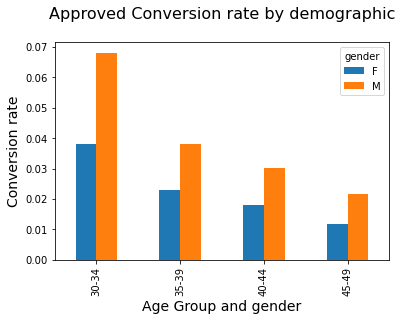

xyz_campaign_id  age    gender
916              30-34  F         0.111111
                        M         0.333333
                 35-39  F         0.250000
                        M         0.384615
                 40-44  F         1.000000
                        M         0.230769
                 45-49  F         0.181818
                        M         0.071429
936              30-34  F         0.209677
                        M         0.490000
                 35-39  F         0.096491
                        M         0.255319
                 40-44  F         0.046693
                        M         0.240741
                 45-49  F         0.023909
                        M         0.086667
1178             30-34  F         0.031167
                        M         0.057002
                 35-39  F         0.018325
                        M         0.033066
                 40-44  F         0.016263
                        M         0.024478
                 45-49 

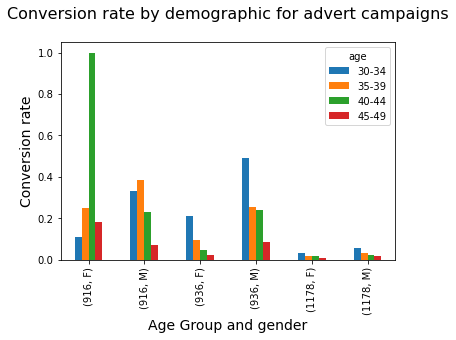

In [9]:
# Calculate conversion rate by date served and age group
demographicGroup_conv = conversion_rate(marketingData,['age','gender'],'Approved_Conversion')
demographicGroup_df = pd.DataFrame(demographicGroup_conv.unstack(level = 1))


# Plot the results
demographicGroup_df.plot(kind = 'bar')
plt.title('Approved Conversion rate by demographic\n', size = 16)
plt.ylabel('Conversion rate', size = 14)
plt.xlabel('Age Group and gender', size = 14)
plt.show()


# Calculate conversion rate by date served and age group for ad campaign
demographicGroup_conv = conversion_rate(marketingData,['xyz_campaign_id','age','gender'],'Approved_Conversion')
demographicGroup_df = pd.DataFrame(demographicGroup_conv.unstack(level = 1))

# Plot the results
demographicGroup_df.plot(kind = 'bar')
plt.title('Conversion rate by demographic for advert campaigns\n', size = 16)
plt.ylabel('Conversion rate', size = 14)
plt.xlabel('Age Group and gender', size = 14)
plt.show()

Implications and possible actions:

This is very similar to the previous finding in terms of targeting a demographic. The only difference is this is based on lead generation as multiple conversions from the same source are not counted. The company can therefore model a lookalike audience around males and females of the age group 30-34 moving forward to potentially generate more income. If further analysis is needed, the conversion rates can be studied for particular advertising campaigns.